**Modules**

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path

**Create the Dataset with Linear Regression Formula Y = weights * X + Bias**

In [ ]:
# Define\Initializing the Weights and Bias
weights = 0.7
Bias    = 0.3

# Create the X Dataset
X = torch.arange(start = 0, end = 1, step = 0.02).unsqueeze(dim = 1)

# Create the Y Dataset
Y = Bias + weights * X

**Splitting the Data into Training & Testing**

In [ ]:
# Split the Data into Training and Testing
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.10 , random_state = 42)

# Display the Lenght of the Training/Testing Data
print(f"The Lenght of the X Train is : {len(x_train)}")
print(f"The Lenght of the Y Train is : {len(y_train)}")
print(f"The Lenght of the X Test  is : {len(x_test)}")
print(f"The Lenght of the Y Test  is : {len(y_test)}")

The Lenght of the X Train is : 45
The Lenght of the Y Train is : 45
The Lenght of the X Test  is : 5
The Lenght of the Y Test  is : 5


**Visualization Dataset**

In [ ]:
# Define the Function that Visualization the Result
def plot_data(xtrain = x_train , ytrain = y_train , xtest = x_test , ytest = y_test , prediction = None):
  # Display the Training Data
  plt.scatter(xtrain , ytrain , c = "b" , s = 4 , label = "Training Dataset")
  # Display the Testing Data
  plt.scatter(xtest  , ytest  , c = "g" , s = 4 , label = "Testing Dataset")
  # Display the Prediction Data
  if prediction is not None:
    plt.scatter(xtest , prediction , c = "r" , s = 4 , label = "Prediction Dataset")
  
  plt.legend(prop = {"size" : 8})

In [ ]:
# Display the Training & Testing Data
plot_data()

**Build Pytorch Linear Model**

In [ ]:
# Create the Linear Regression Model by subclassing (nn.Module)
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Create the Linear Model Parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  
  # Create the Forward Propagation Method
  def forward(self , x : torch.Tensor):
    return self.linear_layer(x)

# Set the Manual Seed
torch.manual_seed(42)

# Create the Object of the Linear Regression Model
model = LinearRegressionModel()

# Display the Parameters of the Linear Regression Model
print(list(model.parameters()) , end = "\n\n")
print(model.state_dict())

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [ ]:
# Setup the Loss Function 
loss = nn.L1Loss()

# Setup the Optimizer Function
optimizer = torch.optim.SGD(params = model.parameters() , lr = 0.01)

In [ ]:
# Let's write the Train Loop

epochs = 100
for epoch in range(epochs+1):
  # 1. Train the Model
  model.train()
  # 2. Predict the Train Data 
  trainPredict = model(x_train)
  # 3. Calculate the Loss of Train Predict Data
  calLoss = loss(trainPredict , y_train)
  # 4. Optimizer Zero_Grad
  optimizer.zero_grad()
  # 5. Perform the Backward Propagation
  calLoss.backward()
  # 6. Apply the Optimizer
  optimizer.step()

  model.eval() # of the All calculation that's usefull to evaluate the Model/Predict the Result
  with torch.inference_mode():
    # Predict the Test Data
    testPredict = model(x_test)
    # Claculate the Loss of Test Predict Data
    lossTest = loss(testPredict , y_test)

    if epoch % 10 == 0:
      print(f"Epochs : {epoch} | Train Loss : {calLoss} | Test Loss : {lossTest}")

Epochs : 0 | Train Loss : 0.5487067699432373 | Test Loss : 0.5416474342346191
Epochs : 10 | Train Loss : 0.4256243407726288 | Test Loss : 0.41397398710250854
Epochs : 20 | Train Loss : 0.3025417625904083 | Test Loss : 0.28630051016807556
Epochs : 30 | Train Loss : 0.17945922911167145 | Test Loss : 0.15862712264060974
Epochs : 40 | Train Loss : 0.05741007626056671 | Test Loss : 0.03779097646474838
Epochs : 50 | Train Loss : 0.0349002368748188 | Test Loss : 0.02938556671142578
Epochs : 60 | Train Loss : 0.029533253982663155 | Test Loss : 0.026072239503264427
Epochs : 70 | Train Loss : 0.024491867050528526 | Test Loss : 0.021738778799772263
Epochs : 80 | Train Loss : 0.01945047825574875 | Test Loss : 0.017405342310667038
Epochs : 90 | Train Loss : 0.014417656697332859 | Test Loss : 0.01273877639323473
Epochs : 100 | Train Loss : 0.009384834207594395 | Test Loss : 0.008072209544479847


In [ ]:
# Display the Parameters of Linear Regression Model
print(model.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.6650]])), ('linear_layer.bias', tensor([0.3185]))])


**Prediction and Evaluation Model**

In [ ]:
# Predict the Result of Linear Regression Model
model.eval()
with torch.inference_mode():
  y_pred = model(x_test)

# Display the Predicted Data
y_pred

tensor([[0.4914],
        [0.8371],
        [0.7174],
        [0.9169],
        [0.5445]])

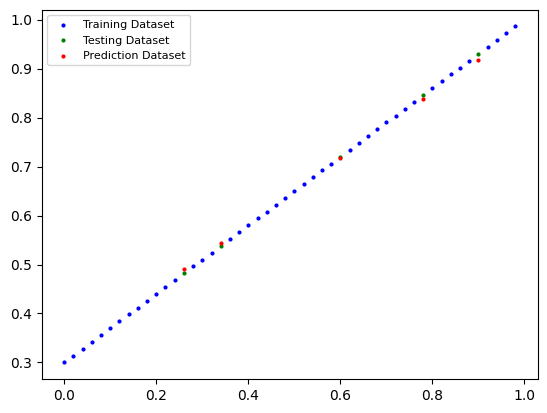

In [ ]:
# Visualization the Training/Testing and Predicted Data
plot_data(prediction = y_pred)

**Saving & Loading the Trained Model**

In [ ]:
# Create the Path pf the Model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True ,  exist_ok = True)

# Create the Model Name
MODEL_NAME = "pytorch_linear_regression_model00.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the Model
torch.save(obj = model.state_dict() , f = MODEL_SAVE_PATH)

In [ ]:
# Create the Object Linear Regression Model
model_0 = LinearRegressionModel()

# Load the Trained Modek
model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# Display the Parameters of the Loaded Model
print(model_0.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.6650]])), ('linear_layer.bias', tensor([0.3185]))])
